In [12]:
import pandas as pd
import numpy as np

data40 = pd.read_csv('data40.csv')
# data40 = data40.reset_index()
# # print(data40)
# print(data40.iloc[2:, 20:1])
total_data = data40.iloc[2:, 19:-1]
total_data = total_data.reset_index(drop=True)# reset index
# print(total_data)
# total_data = total_data.reset_index(drop=False) # reset index
total_data = total_data.astype(dtype='int64') # To int


# df = pd.melt(total_data, id_vars='')

total_data_np = total_data.values
total_data_np = total_data_np.astype(np.int64)
print(total_data_np)

[[4 3 5 ... 3 5 4]
 [2 4 5 ... 2 2 1]
 [3 1 4 ... 1 2 4]
 ...
 [1 1 5 ... 1 1 5]
 [1 1 6 ... 1 1 3]
 [1 1 6 ... 2 1 3]]


In [2]:
print('The rotation is:')
print(' 1 - 怒り - anger,\n 2 - 恐怖 - fear,\n 3 - 幸福 - happiness, \n 4 - 悲しみ - sadness, \n 5 - 驚き - surprise,\n 6 - 嫌悪 - disgust, \n 7 - 中性 - neutral')

The rotation is:
 1 - 怒り - anger,
 2 - 恐怖 - fear,
 3 - 幸福 - happiness, 
 4 - 悲しみ - sadness, 
 5 - 驚き - surprise,
 6 - 嫌悪 - disgust, 
 7 - 中性 - neutral


In [32]:
print(total_data_np.mean(axis=0))

[1.675 1.275 5.425 1.6   1.35  1.575 2.45  5.1   3.65  1.225 4.4   2.025
 5.725 2.075 4.    2.3   1.5   2.725 1.925 4.475 2.25  4.5   2.85  1.35
 2.175 4.    3.625 1.775 5.475 3.4   1.15  2.175 3.9   4.025 1.6   5.625
 2.8   1.4   2.025 3.175 3.8   1.525 5.45  2.775 1.425 2.025 3.075 4.
 1.55  5.275 3.2   1.125 2.175 3.275 4.35  1.5   5.55  3.15  1.25  2.3
 3.525 4.    1.7   2.025 1.675 1.425 2.5   1.375 2.65  4.6   3.125 2.325
 1.425 2.2   3.325 3.175 2.85  4.7   2.55  1.35  2.35  2.05  4.425 1.975
 3.1   2.45  1.525 3.65  1.925 3.8   2.075 3.775 2.55  1.3   3.025 1.9
 4.625 2.15  4.35  2.825 1.35  2.35  2.375 3.825 2.025 4.225 3.    1.425
 2.725 2.325 4.7   1.775 4.05  2.925 1.4   2.45  2.55  4.075 2.075 4.55
 3.1   1.325 2.125 4.675 3.475 1.85  4.925 3.175 1.3   2.4   2.625 4.4
 1.725 4.4   3.225 1.25  2.825 2.95  4.125 1.725 4.5   3.65  1.3   3.025
 3.075 4.5   1.7   4.175 3.35  1.35  3.3   2.9   4.45  1.6   4.15  3.
 1.4   2.2   3.15  3.925 1.625 1.55  1.525 4.675 1.7   1.35  1.47

In [3]:
practiceHA_data = total_data.iloc[:, 0:7].copy()

In [ ]:
print(anger_only_data)

In [4]:
# deprecated
anger_data = total_data.iloc[:, 14:14+7*7].copy()
# print(anger_data)
anger_only_data = anger_data.iloc[:, [0, 7, 14]]
# print(anger_only_data)
print('mean of anger:')
print(anger_only_data.mean(axis=0))
# anger_only_data.to_csv('anger_only_data.csv')

# print(anger_only_data['Namba normal An_1'])
an_arr = anger_only_data.to_numpy()
# print(an_arr)
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(an_arr[0], an_arr[1], an_arr[2])
print("ANOVA F is:", fvalue, "\np value is:", pvalue)

mean of anger:
Namba normal An_1    4.000
Namba hot Anger_1    4.500
BOA Anger 0_1        5.475
dtype: float64
ANOVA F is: 1.1818181818181819 
p value is: 0.3692056382016932


# Anger - plot a bar chart

['Namba normal An_1', 'Namba hot Anger_1', 'BOA Anger 0_1', 'BOA Anger 3_1', 'BOA Anger 5_1', 'BOA Anger 8_1', 'BOA Anger 9_1']
     index           stimulus  rating
0        0  Namba normal An_1       4
1        1  Namba normal An_1       5
2        2  Namba normal An_1       5
3        3  Namba normal An_1       1
4        4  Namba normal An_1       6
..     ...                ...     ...
275     35      BOA Anger 9_1       4
276     36      BOA Anger 9_1       5
277     37      BOA Anger 9_1       1
278     38      BOA Anger 9_1       4
279     39      BOA Anger 9_1       7

[280 rows x 3 columns]


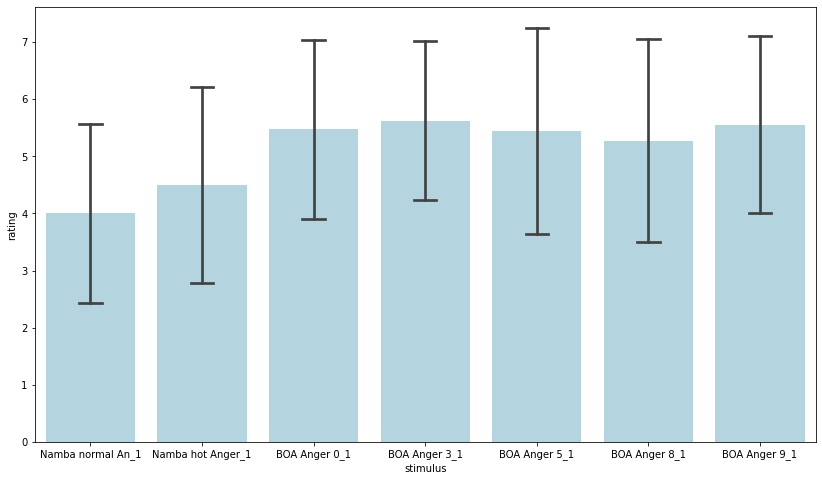

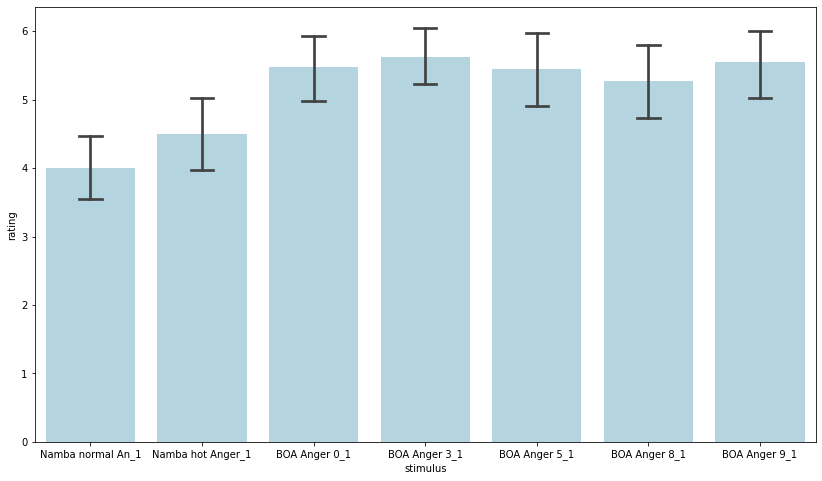

In [32]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# total_data
anger_data = total_data.iloc[:, 14:14+7*7].copy()
anger_data_with_an_rating = anger_data.iloc[:,[ 7 * x for x in range(7)]]
# print(anger_data_with_an_rating)
anger_data_with_an_rating = anger_data_with_an_rating.reset_index(drop=False)
print(list(anger_data_with_an_rating.columns)[1:])
df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
print(df)

# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, capsize=.2, color='lightblue')

# Disgust & the rest

In [52]:
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
print(emo_names)

['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']


In [69]:
list(total_data.columns)
def show_figure(id):
    emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
    def get_emo_num(name):
        if name.lower() == 'anger':
            return 0
        elif name.lower() == 'disgust':
            return 5
        elif name.lower() == 'fear':
            return 1
        elif name.lower() in ["Happiness", "happiness"]:
            return 2
        elif name.lower() in ["Sadness", "sadness"]:
            return 3
        elif name.lower() in ["Surprise", "surprise"]:
            return 4
        elif name.lower() in ["Neutral", "neutral"]:
            return 6
            
        
        
    for i in range(7):
        if i != id:
            continue
        current_emo = emo_names[i]
        print('current emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#         print(temp_data)
        temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(7)]]
#         print(temp_data_with_temp_rating.iloc[:2, :2])
        temp_data_with_temp_rating = temp_data_with_temp_rating.reset_index(drop=False)
#         print(list(temp_data_with_temp_rating.columns)[:])
        df = pd.melt(temp_data_with_temp_rating, id_vars='index', value_vars=list(temp_data_with_temp_rating.columns)[1:],
                     var_name='stimulus', value_name='rating')
#         print(df)

#         # Set the figure size
        plt.figure(figsize=(14, 8))
        print('error bar means standard deviation')
#         # plot a bar chart
        ax = sns.barplot(x="stimulus", y="rating_with_sderr", data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')

        print('error bar means 95% confidence interval')
        plt.figure(figsize=(14, 8))
        ax2 = sns.barplot(x="stimulus", y="rating_with95%condif", data=df, estimator=np.mean, capsize=.2, color='lightblue')



current emo is  anger


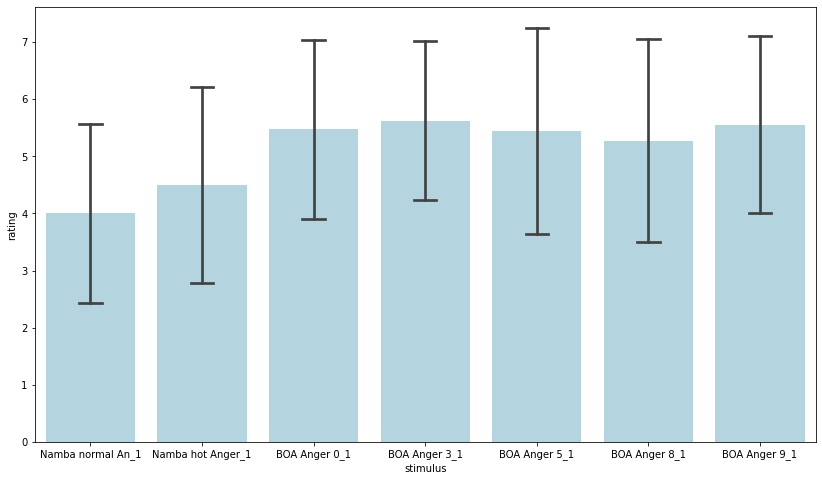

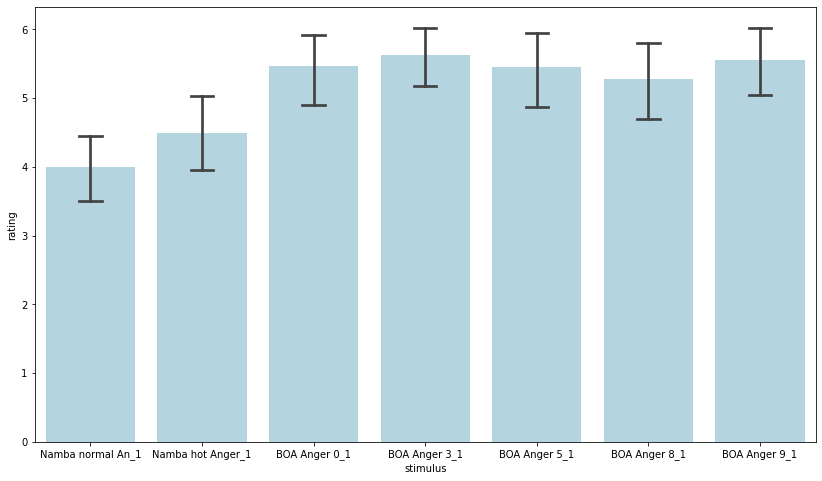

In [70]:
show_figure(0)

current emo is  disgust


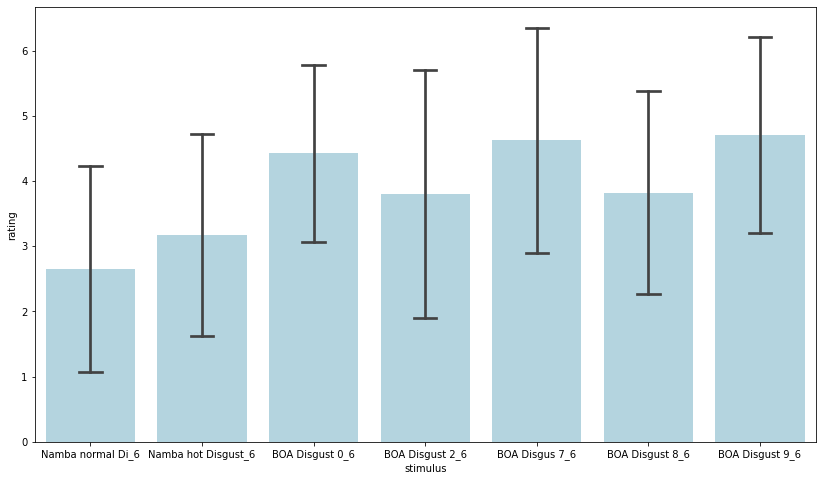

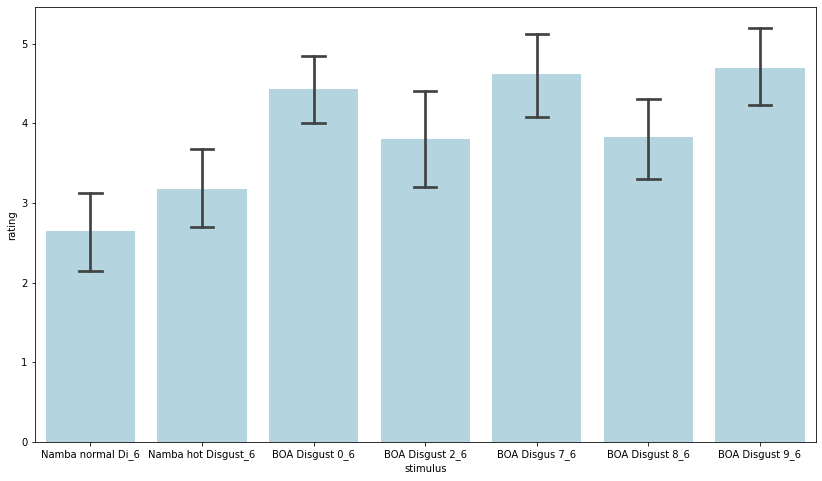

In [71]:
show_figure(1)

current emo is  fear


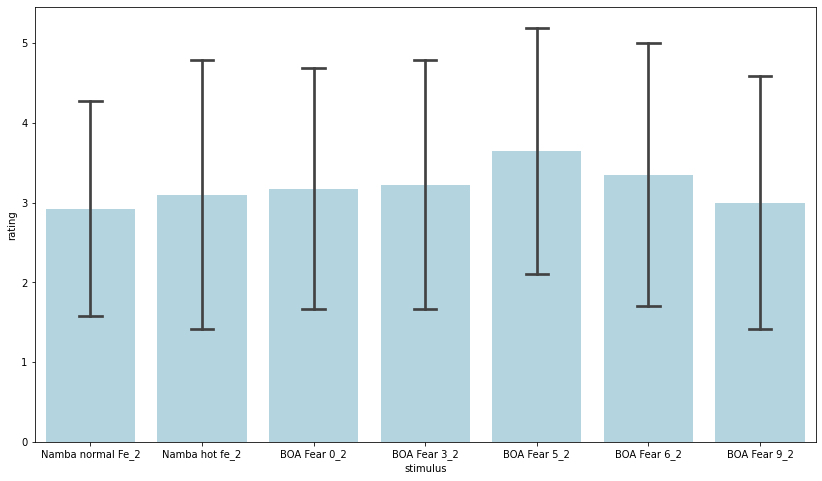

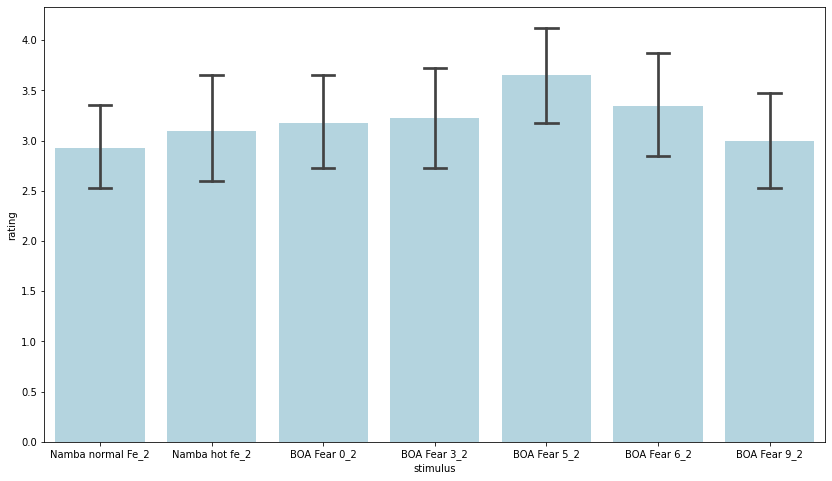

In [72]:
show_figure(2)

current emo is  happiness


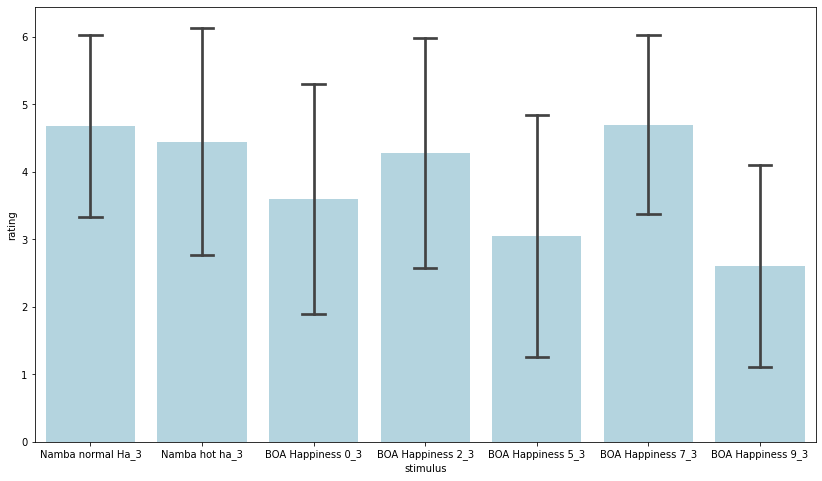

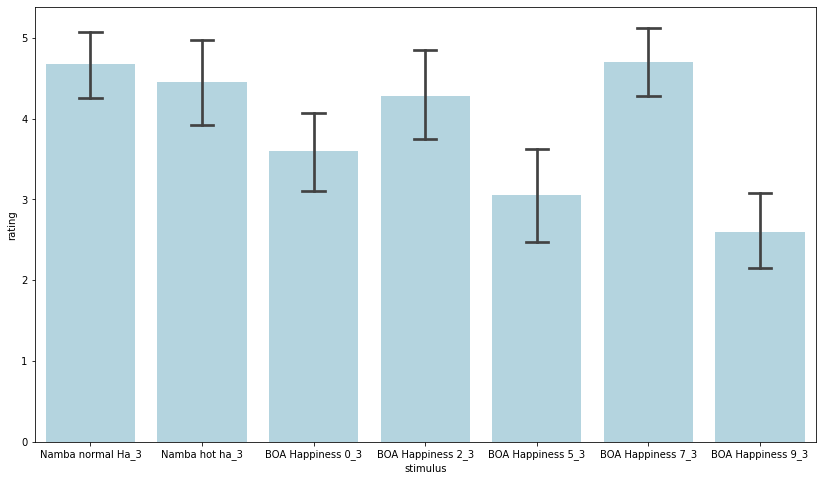

In [73]:
show_figure(3)

current emo is  sadness


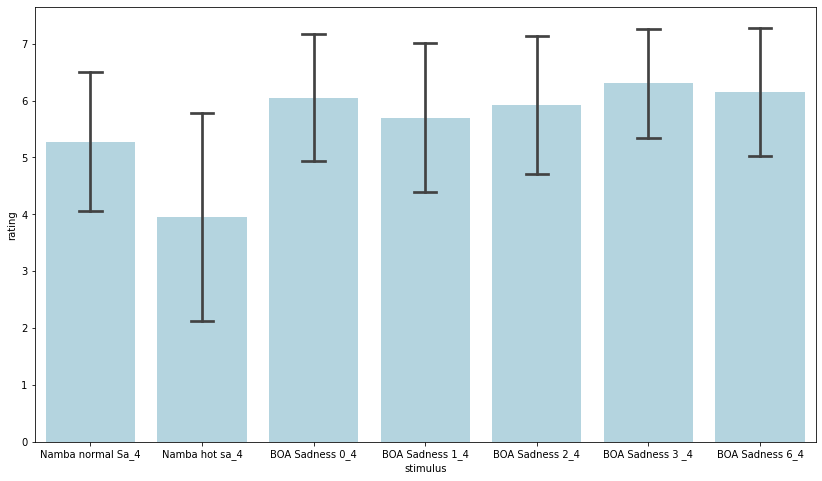

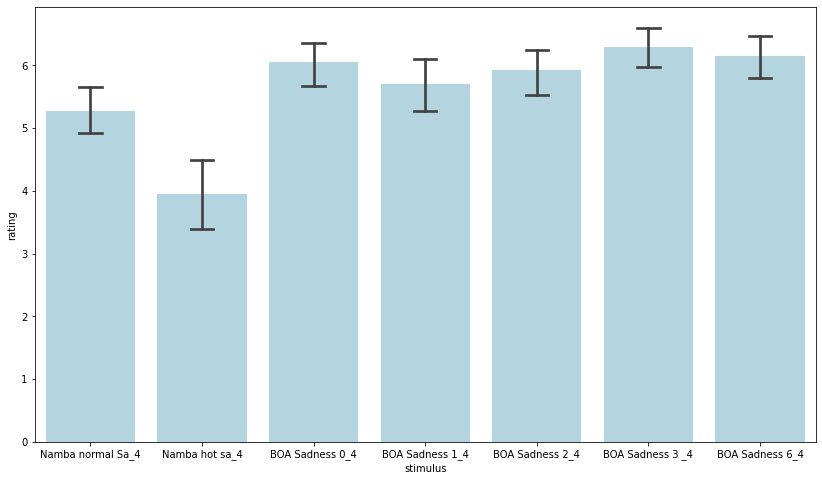

In [74]:
show_figure(4)

current emo is  surprise


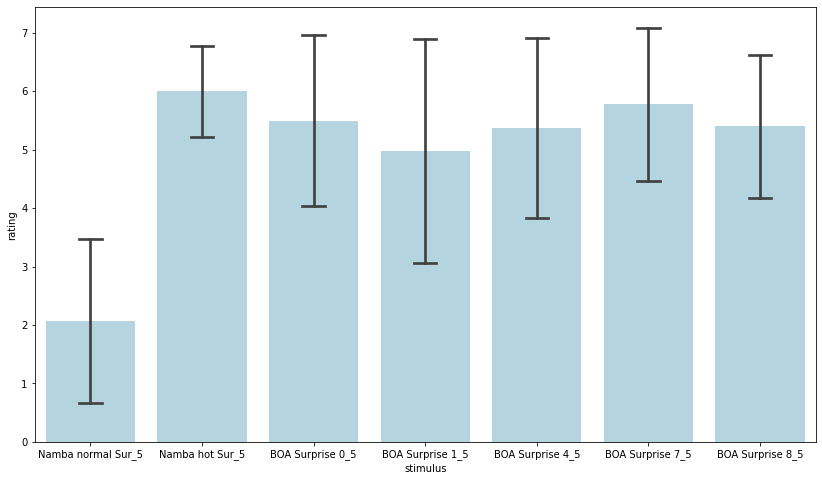

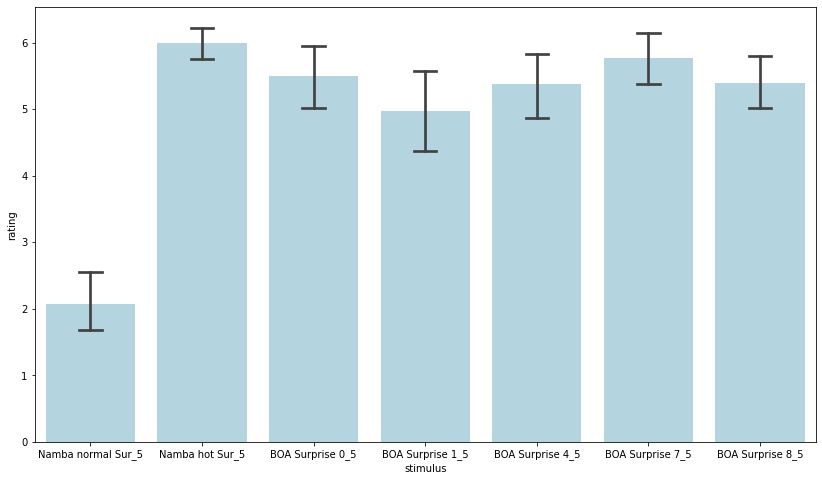

In [75]:
show_figure(5)

current emo is  neutral


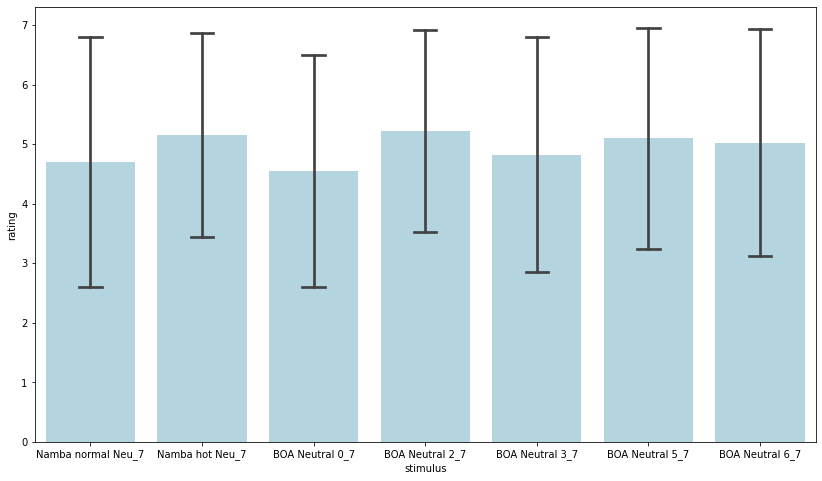

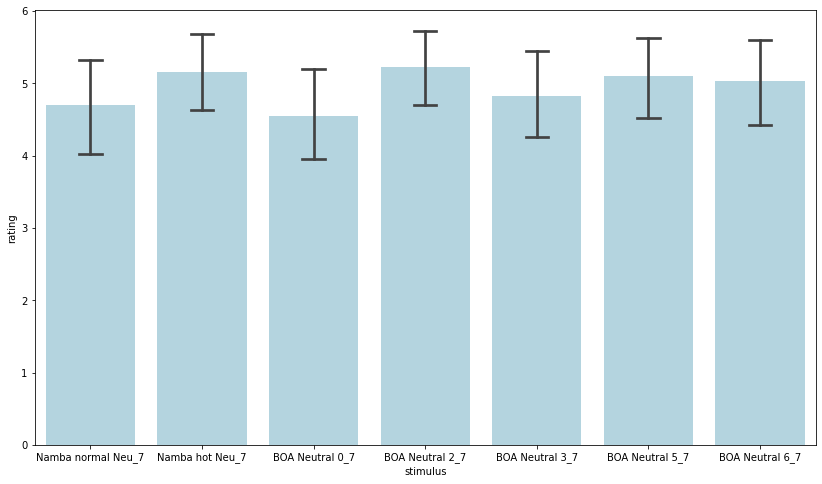

In [76]:
show_figure(6)

In [77]:
# show_figure(7)

In [ ]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# total_data

anger_data = total_data.iloc[:, 14:14+7*7].copy()
anger_data_with_an_rating = anger_data.iloc[:,[ 7 * x for x in range(7)]]
# print(anger_data_with_an_rating)
anger_data_with_an_rating = anger_data_with_an_rating.reset_index(drop=False)
print(list(anger_data_with_an_rating.columns)[1:])
df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
print(df)

# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, capsize=.2, color='lightblue')

# oneway ANOVA

In [10]:
anger_only_data = pd.read_csv('anger_only_data.csv')
# print(anger_only_data['Namba normal An_1'])
an_arr = anger_only_data.to_numpy()
# print(an_arr)
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(an_arr[0], an_arr[1], an_arr[2])
print("ANOVA F is:", fvalue, "\np value is:", pvalue)



ANOVA F is: 1.388888888888889 
p value is: 0.2980617117584766


# T-Test

In [ ]:
stats.ttest_1samp(a=)


In [11]:
# from statsmodels.stats.anova import AnovaRM

# #perform the repeated measures ANOVA
# print(AnovaRM(data=anger_only_data, depvar=[], subject=['id'], within=['anger']).fit())

In [77]:
practiceHA_data.mean(axis=0)

PracticeHA_1    1.675
PracticeHA_2    1.275
PracticeHA_3    5.425
PracticeHA_4    1.600
PracticeHA_5    1.350
PracticeHA_6    1.575
PracticeHA_7    2.450
dtype: float64